<a href="https://colab.research.google.com/github/santana-robledo/Posgrado_Robotica_e_Inteligencia_Artificial/blob/main/Sistemas%20Inteligentes%20II/L03_Red_Neuronal_de_una_sola_capa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Neuronal de una sola capa
## Josue Santana Robledo Corona

Paso 1. Corre la siguiente casilla para importar la paquetería necesaria.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Paso 2. Corre el siguiente bloque con las funciones de activación programadas en la práctica anterior

In [15]:
# La función de activación lineal se usa en problemas de regresión
def linear(z, derivative=False):
  a = z
  if derivative:
    da = np.ones(z.shape, dtype=float)
    return a, da
  return a

# La función de activación logística se usa en
# problemas de clasificación multi-etiquetas
def logistic(z, derivative=False):
  a = 1/(1 + np.exp(-z))
  if derivative:
    da = np.ones(z.shape, dtype=float)
    return a, da
  return a

Paso 3. Programa la función de activación Softmax

In [16]:
# La función de activación Softmax se usa en
# problemas de clasificación multiclase con un
# solo ganador
def softmax(z, derivative=False):
  z=z - np.max(z,axis=0,keepdims=True)
  exp_z=np.exp(z)
  a=exp_z/np.sum(exp_z,axis=0,keepdims=True)
  return a

Paso 4. Programa una clase que represente una red neuronal de una capa

In [17]:
from types import DynamicClassAttribute
class OLN:
  """One-Layer Network"""

  def __init__(self, n_inputs, n_outputs,
               activation_funtion=linear):
    self.w = - 1 + 2 * np.random.rand(n_outputs, n_inputs)
    self.b = - 1 + 2 * np.random.rand(n_outputs, 1)
    self.f = activation_funtion

  def predict(self, X):
    Z=np.dot(self.w,X)+self.b
    return self.f(Z)

  def fit(self, X, Y, epochs=1000,  lr=0.1):
    p=X.shape[1]
    for _ in range(epochs):
      Z=np.dot(self.w,X)+self.b
      A=self.f(Z)

    dZ= A-Y
    dW= (1/p)*np.dot(dZ,X.T)
    dB= (1/p)*np.sum(dZ, axis=1,keepdims=True)

    self.w -= lr * dW
    self.b -= lr * dB

# Primer experimento: Clasificación multi-etiqueta

Paso 5. Carga el archivo 'DataSet_A03.csv', contiene entradas de dos dimensiones y salidas deseadas de 4 dimensiones.

In [18]:
df = pd.read_csv('Dataset_A03.csv')

Paso 6.  Crea la matriz X de entrada y la matriz Y de salidas deseadas.

In [19]:
# Escribe en el siguiente apartado la matriz X y Y
X = df[["x1","x2"]].values.T
Y = df[["y1","y2","y3","y4"]].values.T

Paso 7. Corre la siguiente función que te ayudará a dibujar el experimento

In [20]:
def plot_data(X, Y, net):
  dot_c = ('red', 'green', 'blue', 'black')
  lin_c = ('r-', 'g-', 'b-', 'k-')
  for i in range(X.shape[1]):
      c = np.argmax(Y[:,i])
      plt.scatter(X[0,i], X[1,i], color=dot_c[c], edgecolors='k')

  for i in range(4):
      w1, w2, b = net.w[i,0], net.w[i,1], net.b[i]
      plt.plot([-0.25, 1.25],[(-1/w2)*(w1*(-0.25)+b),(-1/w2)*(w1*(1.25)+b)], lin_c[i])


  #plt.axis('equal')
  plt.xlim([-0.25, 1.25])
  plt.ylim([-0.25, 1.25])

Paso 8. Crea y entrena tu red neuronal con los datos que trabajaste y dibuja el resultado con la función anterior.

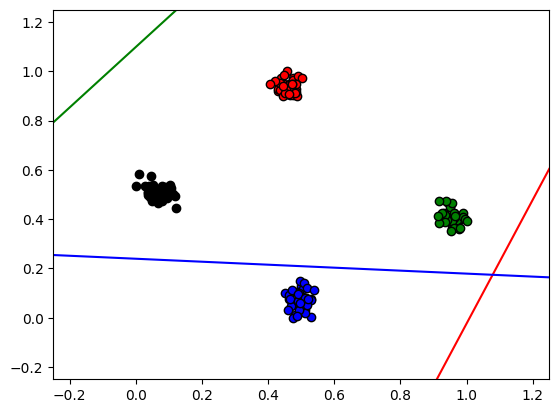

In [21]:
red = OLN(n_inputs=2, n_outputs=4, activation_funtion=softmax)
red.fit(X, Y, epochs=1000, lr=0.1)
plot_data(X, Y, red)
plt.show()

# Segundo experimento: Clasificación con un solo ganador

Paso 9. Corre el siguiente ejemplo para generar un conjunto de datos de Clasificación con un solo ganador

In [22]:
# Generación de Conjunto de datos para clasificación

# Límites
minx = -5
maxx = 5

# Número de clases y puntos por clase
classes = 8
p_c = 20
X = np.zeros((2, classes * p_c))
Y = np.zeros((classes, classes * p_c))


for i in range(classes):
    seed = minx + (maxx - minx) * np.random.rand(2,1)
    X[:, i*p_c:(i+1)*p_c] = seed + 0.15 * np.random.randn(2, p_c)
    Y[i, i*p_c:(i+1)*p_c] = np.ones((1, p_c))

Paso 10. Entrena una red neuronal para aprender el conjunto de datos anterior, guarda en la variable Ypred la predicción de todos los datos.

In [23]:
# Instancia una red neuronal con el numero de entradas, salidas
# y función de activación correctas
net = OLN(n_inputs=2, n_outputs=8, activation_funtion=softmax) #Numero de entradas son 2, x1 y x2, numero de salidas son 8

# Entrena la red neuronal
net.fit(X, Y, epochs=1000, lr=0.1)

# Guarda las predicciones de la red de todos los datos en X
Ypred = net.predict(X)

Paso 11. Corre el siguiente código para graficar tus resultados

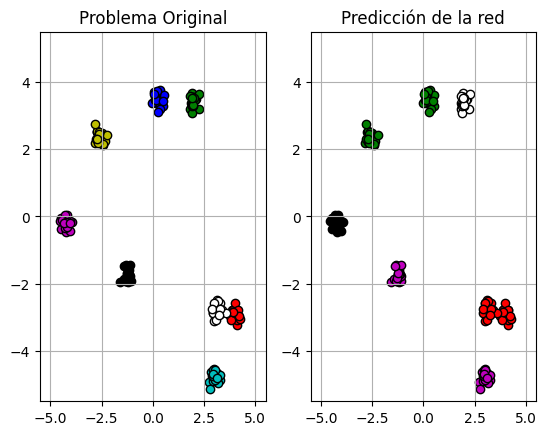

In [24]:
# Colores para dibujar las clases

cm	= ['b','g','r','c','m','y', 'k', 'w']

# Gráfico con los datos originales
ax1=plt.subplot(1, 2, 1)
y_c =np.argmax(Y, axis=0)
for i in range(X.shape[1]):
    ax1.scatter(X[0,i], X[1,i], c=cm[y_c[i]], edgecolors='k')
ax1.axis([-5.5,5.5,-5.5,5.5])
ax1.set_title('Problema Original')
ax1.grid()

# Gráfico de las predicciones de la red
ax2=plt.subplot(1, 2, 2)
y_c =np.argmax(Ypred, axis=0)
for i in range(X.shape[1]):
    ax2.scatter(X[0,i], X[1,i], c=cm[y_c[i]], edgecolors='k')
ax2.axis([-5.5,5.5,-5.5,5.5])
ax2.set_title('Predicción de la red')
ax2.grid()

plt.show()